# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


Lets start from calculating gradient of f(x):  
$\frac{df}{dx} = -4x^3 + 8x - 2$   

$\frac{dg}{dx} = -2x + 2y$  
$\frac{dg}{dy} = -2y + 2x - z$  
$\frac{dg}{dz} = -2z - y + 3$  

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
eps = 1e-6

def f(x):
    return -pow(x, 4) + 4 * x*x - 2*x +1

def df(x):
    return -4 * pow(x, 3) + 8 * x - 2

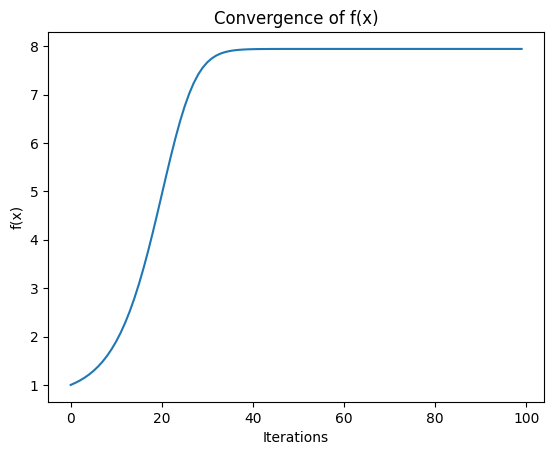

In [4]:
import torch
from mpl_toolkits.mplot3d import Axes3D

def maximize_f_x():
    def f(x):
        return -x**4 + 4*x**2 - 2*x + 1

    x = torch.tensor(0.0, requires_grad=True)
    alpha = 0.01  # learning rate
    num_iterations = 100
    values = []

    for _ in range(num_iterations):
        y = f(x)
        y.backward()  # compute gradient
        with torch.no_grad():
            x += alpha * x.grad
            x.grad.zero_()
        values.append(y.item())

    # plot
    plt.plot(values)
    plt.title("Convergence of f(x)")
    plt.xlabel("Iterations")
    plt.ylabel("f(x)")
    plt.show()

maximize_f_x()


C:\Users\patry\AppData\Local\Temp\ipykernel_8180\2207400729.py:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  path = torch.tensor(path)


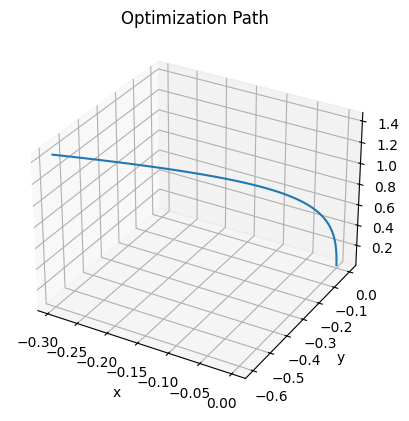

In [5]:
# (b) maximize f(x, y, z)
def maximize_f_xyz():
    def f(x, y, z):
        return -x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z

    vars = torch.tensor([0.0, 0.0, 0.0], requires_grad=True)
    alpha = 0.01  # learning rate
    num_iterations = 100
    path = []  # store (x, y, z) path

    for _ in range(num_iterations):
        x, y, z = vars
        y_value = f(x, y, z)
        y_value.backward()  # compute gradients
        with torch.no_grad():
            vars += alpha * vars.grad  # gradient ascent
            vars.grad.zero_()  # clear gradients
        path.append(vars.clone().detach().numpy())

    # convert path to 3D coordinates
    path = torch.tensor(path)
    x, y, z = path[:, 0], path[:, 1], path[:, 2]

    # plot 3D path
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot(x, y, z)
    ax.set_title("Optimization Path")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()

maximize_f_xyz()


## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [19]:
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon



**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


In [23]:
import torch
from torch import nn

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # one feature and one target

    def forward(self, x):
        return self.linear(x)


def train(model, loss_fn, optimizer, epochs = 1000, print_loss=True):
    losses = []
    # training loop
    for epoch in range(epochs):
        model.train()
        
        # Compute prediction error
        y_pred = model(X_tensor)
        loss = loss_fn(y_pred, y_tensor)

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        losses.append(loss.item())
        
        if print_loss and (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    return losses

def plot_compare(model, X, y):
    # plot the data and the regression line
    model.eval()  # set the model to evaluation mode
    with torch.no_grad():
        y_pred = model(X_tensor)

    plt.scatter(X, y, label='Data', color='blue')
    plt.plot(X, y_pred.numpy(), label='Fitted Line', color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    print(f"Learned parameters: Weight = {model.linear.weight.item()}, Bias = {model.linear.bias.item()}")



Using cpu device


LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Epoch [100/1000], Loss: 0.3237
Epoch [200/1000], Loss: 0.0157
Epoch [300/1000], Loss: 0.0100
Epoch [400/1000], Loss: 0.0099
Epoch [500/1000], Loss: 0.0099
Epoch [600/1000], Loss: 0.0099
Epoch [700/1000], Loss: 0.0099
Epoch [800/1000], Loss: 0.0099
Epoch [900/1000], Loss: 0.0099
Epoch [1000/1000], Loss: 0.0099


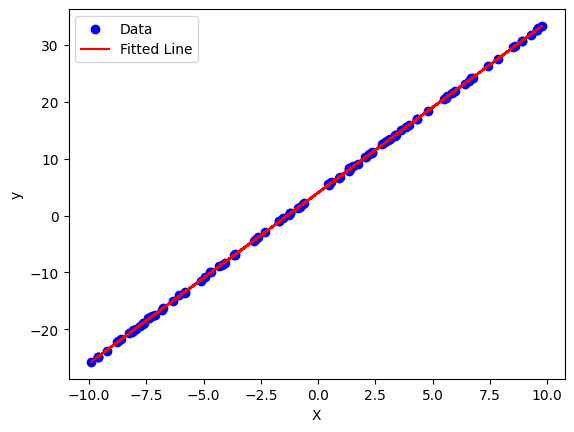

Learned parameters: Weight = 2.9996845722198486, Bias = 4.019050121307373


In [24]:
model = LinearRegressionModel().to(device)
print(model)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

train(model, loss_fn, optimizer, 1000)
plot_compare(model, X, y)

## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


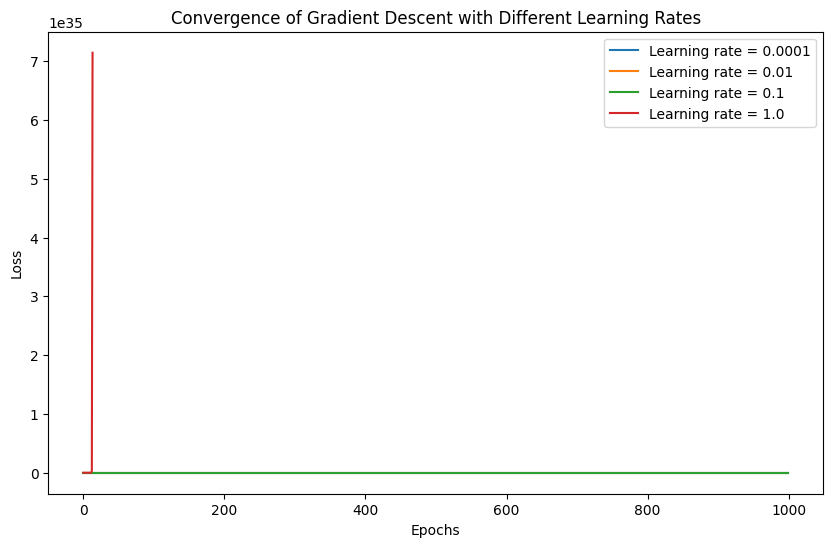

In [15]:
def plot_loss_curves(learning_rates):
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        model = LinearRegressionModel().to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        loss_fn = nn.MSELoss()
        
        losses = train(model, loss_fn, optimizer, epochs=1000, print_loss=False)
        # plot_compare(model, X, y)
        
        plt.plot(losses, label=f'Learning rate = {lr}')
        
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Convergence of Gradient Descent with Different Learning Rates')
    plt.show()

learning_rates = [0.0001, 0.01, 0.1, 1.0]
plot_loss_curves(learning_rates)

## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


In [26]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon



**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


In [91]:
# transform the dataset to include polynomial features
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
X_poly = np.vstack((X, X**2, X**3)).T  # create polynomial features up to degree 3
X_poly_tensor = torch.tensor(X_poly, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [92]:
# define a general regression model
class PolynomialRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)  # adjust input dimensions for polynomial features

    def forward(self, x):
        return self.linear(x)
    

def train(model, loss_fn, optimizer, epochs=1000, print_loss=True):
    losses = []
    for epoch in range(epochs):
        model.train()
        
        # Compute prediction error
        y_pred = model(X_poly_tensor if model.linear.in_features > 1 else X_tensor.view(-1, 1))
        loss = loss_fn(y_pred, y_tensor)
        
        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        losses.append(loss.item())
        
        if print_loss and (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
    return losses

def plot_results(model, X, y, is_poly=True):
    model.eval()
    with torch.no_grad():
        if is_poly:
            y_pred = model(X_poly_tensor)
        else:
            y_pred = model(X_tensor.view(-1, 1))

    plt.scatter(X, y, label="Data", color="blue", alpha=0.5)
    plt.scatter(X, y_pred.numpy(), label="Predictions", color="red", alpha=0.7)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title("Regression Results")
    plt.show()


Training Linear Regression...
Epoch [100/1000], Loss: 3404.0649
Epoch [200/1000], Loss: 3337.9507
Epoch [300/1000], Loss: 3336.7009
Epoch [400/1000], Loss: 3336.6770
Epoch [500/1000], Loss: 3336.6768
Epoch [600/1000], Loss: 3336.6768
Epoch [700/1000], Loss: 3336.6768
Epoch [800/1000], Loss: 3336.6768
Epoch [900/1000], Loss: 3336.6768
Epoch [1000/1000], Loss: 3336.6768

Training Polynomial Regression...
Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


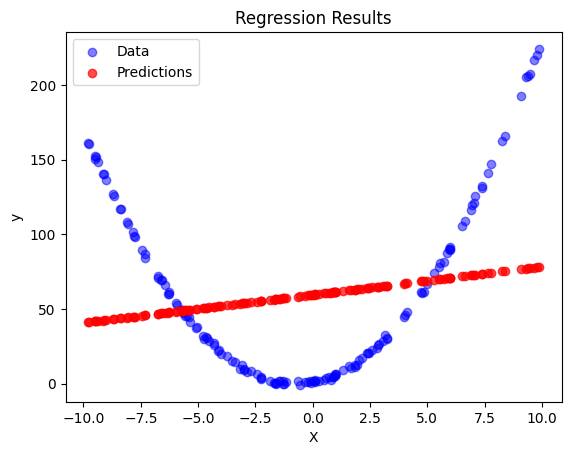

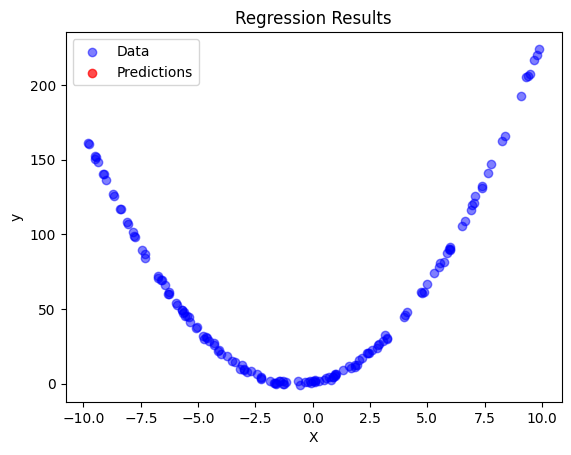

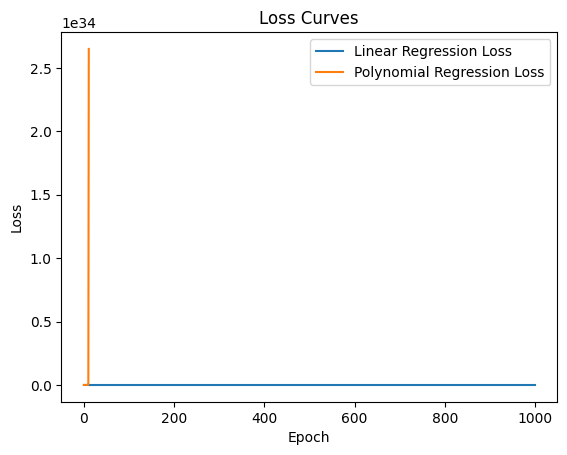

In [93]:
# Train both models and compare
print("\nTraining Linear Regression...")
linear_model = LinearRegressionModel().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)
linear_losses = train(linear_model, loss_fn, optimizer)

print("\nTraining Polynomial Regression...")
poly_model = PolynomialRegressionModel(3).to(device)
optimizer = torch.optim.SGD(poly_model.parameters(), lr=0.0001)
poly_losses = train(poly_model, loss_fn, optimizer)

# plot results
plot_results(linear_model, X, y, is_poly=False)
plot_results(poly_model, X, y, is_poly=True)

# loss curves
plt.plot(linear_losses, label="Linear Regression Loss")
plt.plot(poly_losses, label="Polynomial Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves")
plt.show()


## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


In [108]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon


# sort
indices = np.argsort(X)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


c:\Users\patry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.08433e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


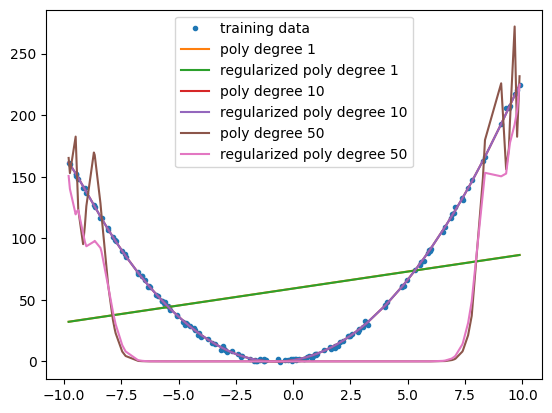

In [110]:
import sklearn
import sklearn.linear_model

def expand(x, d):
    powers = np.arange(d + 1).reshape(1, -1)
    x_expanded = x.reshape(-1, 1) ** powers
    return x_expanded

class PolyRegression(sklearn.linear_model.LinearRegression):
    def __init__(self, degree):
        self.degree = degree
        super().__init__(fit_intercept=False)
    
    def fit(self, x, y):
        return super().fit(expand(x, self.degree), y)

    def predict(self, x):
        return super().predict(expand(x, self.degree)) 
    
class RegularizedPolyRegression(sklearn.linear_model.Ridge):
    def __init__(self, degree, alpha):
        self.degree = degree
        super().__init__(alpha=alpha, fit_intercept=False)
    
    def fit(self, x, y):
        return super().fit(expand(x, self.degree), y)

    def predict(self, x):
        return super().predict(expand(x, self.degree))


plt.plot(X, y, '.', label='training data')

for degree in [1, 10, 50]:
    model = PolyRegression(degree).fit(X_train, y_train)
    plt.plot(X, model.predict(X), '-', label=f'poly degree {degree}')

    model = RegularizedPolyRegression(degree, 0.1).fit(X_train, y_train)
    plt.plot(X, model.predict(X), '-', label=f'regularized poly degree {degree}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()

## 6. Custom Gradient Descent in PyTorch


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.


In [111]:
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon


Epoch [100/1000], Loss: 3407.1042
Epoch [200/1000], Loss: 3338.0078
Epoch [300/1000], Loss: 3336.7021
Epoch [400/1000], Loss: 3336.6770
Epoch [500/1000], Loss: 3336.6768
Epoch [600/1000], Loss: 3336.6768
Epoch [700/1000], Loss: 3336.6768
Epoch [800/1000], Loss: 3336.6768
Epoch [900/1000], Loss: 3336.6768
Epoch [1000/1000], Loss: 3336.6768


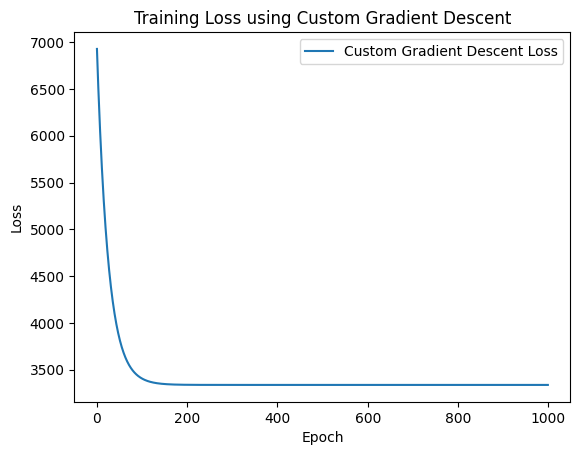

Custom Gradient Descent - Weight: 1.8841257095336914, Bias: 59.51642990112305
PyTorch SGD Optimizer - Weight: 1.8841257095336914, Bias: 59.51642990112305


In [112]:
class CustomLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # one feature and one target

    def forward(self, x):
        return self.linear(x)

def custom_train(model, loss_fn, learning_rate, epochs=1000, print_loss=True):
    losses = []
    for epoch in range(epochs):
        model.train()
        
        # Compute prediction error
        y_pred = model(X_tensor)
        loss = loss_fn(y_pred, y_tensor)
        
        # Backpropagate
        loss.backward()
        
        # Manually update parameters
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        
        # Zero the gradients
        model.zero_grad()
        
        losses.append(loss.item())
        
        if print_loss and (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
    return losses

# Initialize the model, loss function, and learning rate
custom_model = CustomLinearRegressionModel().to(device)
loss_fn = nn.MSELoss()
learning_rate = 0.01

# Train the model using custom gradient descent
custom_losses = custom_train(custom_model, loss_fn, learning_rate, epochs=1000)

# Plot the training loss
plt.plot(custom_losses, label="Custom Gradient Descent Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss using Custom Gradient Descent")
plt.show()

# Compare the learned parameters
print(f"Custom Gradient Descent - Weight: {custom_model.linear.weight.item()}, Bias: {custom_model.linear.bias.item()}")
print(f"PyTorch SGD Optimizer - Weight: {linear_model.linear.weight.item()}, Bias: {linear_model.linear.bias.item()}")

## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


In [113]:

np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))



**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


In [ ]:

np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon



**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


In [ ]:

np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon



**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.
